In [2]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [2]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [4]:
!pip install opendatasets

In [5]:
import opendatasets as od

In [6]:
od.download("https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heshannavindu
Your Kaggle Key: ··········


100%|██████████| 1.17G/1.17G [00:17<00:00, 73.6MB/s]


**//explore the dataset**

In [7]:
import os
import matplotlib.pyplot as plt
import cv2

In [8]:
#define directry
root_di="/content/labeled-chest-xray-images"

In [7]:
#define sub dir to train and test
train_dir='/content/labeled-chest-xray-images/chest_xray/train'
test_dir='/content/labeled-chest-xray-images/chest_xray/test'

# Define classes
classes =['NORMAL', 'PNEUMONIA']
#Display sample data
def display_sample(directory,num_samples=4):
  for class_name in classes:
    class_dir=os.path.join(directory,class_name)
    print(f"Displaying {num_samples} samples from '{class_name}' class:")

    for i, filename in enumerate(os.listdir(class_dir)):
            if i >= num_samples:
                break
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            plt.show()
display_sample(train_dir)
display_sample(test_dir)

Displaying 4 samples from 'NORMAL' class:


FileNotFoundError: [Errno 2] No such file or directory: '/content/labeled-chest-xray-images/chest_xray/train/NORMAL'

In [9]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define subdirectories for train and test sets
train_dir = '/content/labeled-chest-xray-images/chest_xray/train'
test_dir = '/content/labeled-chest-xray-images/chest_xray/test'

# Define classes
classes = ['NORMAL', 'PNEUMONIA']

# Define image size and batch size
target_size = (150, 150)  # Resize images to 150x150
batch_size = 32

# Define a generator for preprocessing and augmenting training images
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
    validation_split=0.2,  # Split data into training and validation sets
    rotation_range=10,  # Random rotation up to 10 degrees
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    zoom_range=0.1,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    vertical_flip=False,  # No vertical flip
    shear_range=0.1  # Random shear
)

# Define a generator for preprocessing validation and testing images
test_datagen = ImageDataGenerator(
    rescale=1.0/255.0  # Rescale pixel values to [0, 1]
)

# Create a generator for loading and preprocessing training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use training subset
)

# Create a generator for loading and preprocessing validation images
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use validation subset
)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [10]:
#building th deep learning model
#build model arachitecture
import tensorflow as tf
from tensorflow.keras import layers, models

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),  # Adjust the number of units in this dense layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
130/130 [==============================] - 351s 3s/step - loss: 0.4516 - accuracy: 0.8031 - val_loss: 0.2599 - val_accuracy: 0.8818
Epoch 2/10
130/130 [==============================] - 352s 3s/step - loss: 0.2822 - accuracy: 0.8842 - val_loss: 0.2083 - val_accuracy: 0.9150
Epoch 3/10
130/130 [==============================] - 343s 3s/step - loss: 0.2180 - accuracy: 0.9100 - val_loss: 0.1694 - val_accuracy: 0.9365
Epoch 4/10
130/130 [==============================] - 363s 3s/step - loss: 0.1928 - accuracy: 0.9256 - val_loss: 0.1477 - val_accuracy: 0.9463
Epoch 5/10
130/130 [==============================] - 356s 3s/step - loss: 0.1687 - accuracy: 0.9365 - val_loss: 0.1251 - val_accuracy: 0.9629
Epoch 6/10
130/130 [==============================] - 340s 3s/step - loss: 0.1640 - accuracy: 0.9386 - val_loss: 0.1226 - val_accuracy: 0.9531
Epoch 7/10
130/130 [==============================] - 345s 3s/step - loss: 0.1643 - accuracy: 0.9360 - val_loss: 0.1330 - val_accuracy: 0.9463

In [14]:
# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=batch_size,
    class_mode='binary'  # Since it's a binary classification task
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Found 624 images belonging to 2 classes.
20/20 [==============================] - 15s 764ms/step - loss: 0.2595 - accuracy: 0.8926
Test Loss: 0.25954514741897583
Test Accuracy: 0.8926281929016113


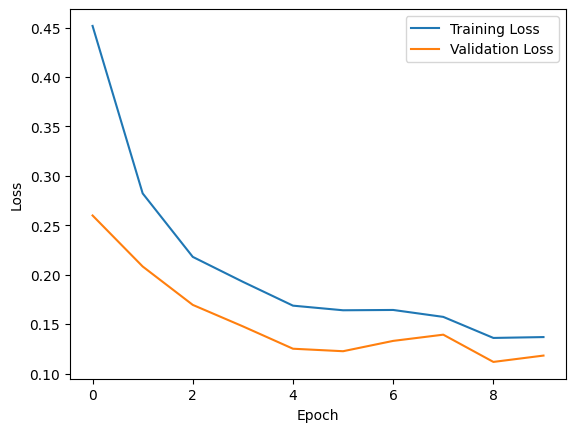

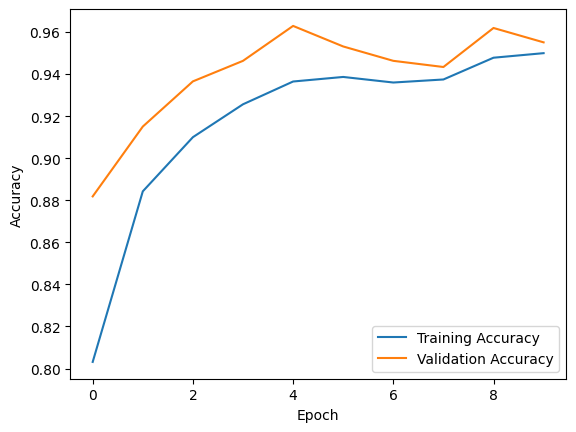

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
model.save('chest_xray_detection_model.h5')  # Save the model
